In [ ]:
!pip install shekar

In [1]:
from shekar.embeddings import WordEmbedder

embbeder = WordEmbedder(model="fasttext-d300", oov_strategy="none")
embbeder("سلام")[:10]

array([ 6.0696564 ,  2.762484  , -2.9090302 , -1.3029586 ,  3.119794  ,
       -2.709272  ,  1.6465836 , -0.23394203,  2.1296117 ,  3.346817  ],
      dtype=float32)

In [2]:
embbeder.similarity("سلام", "درود")

0.4601251482963562

In [3]:
embbeder.most_similar("سیب", top_n=15)

[('سیبم', 0.718625545501709),
 ('سیبه', 0.714570939540863),
 ('سیبو', 0.7008136510848999),
 ('سیبی', 0.694347083568573),
 ('سیب,', 0.6514258980751038),
 ('سیبن', 0.6286789178848267),
 ('سیبها', 0.611755907535553),
 ('سیبچه', 0.5809933543205261),
 ('سیبر', 0.5744665265083313),
 ('سیب\u200cزمینی', 0.5693535804748535),
 ('میوه', 0.5661284923553467),
 ('سیبک', 0.5610304474830627),
 ('انگور', 0.5494240522384644),
 ('سیبیلو', 0.5486345291137695),
 ('سیبزمینی', 0.5449843406677246)]

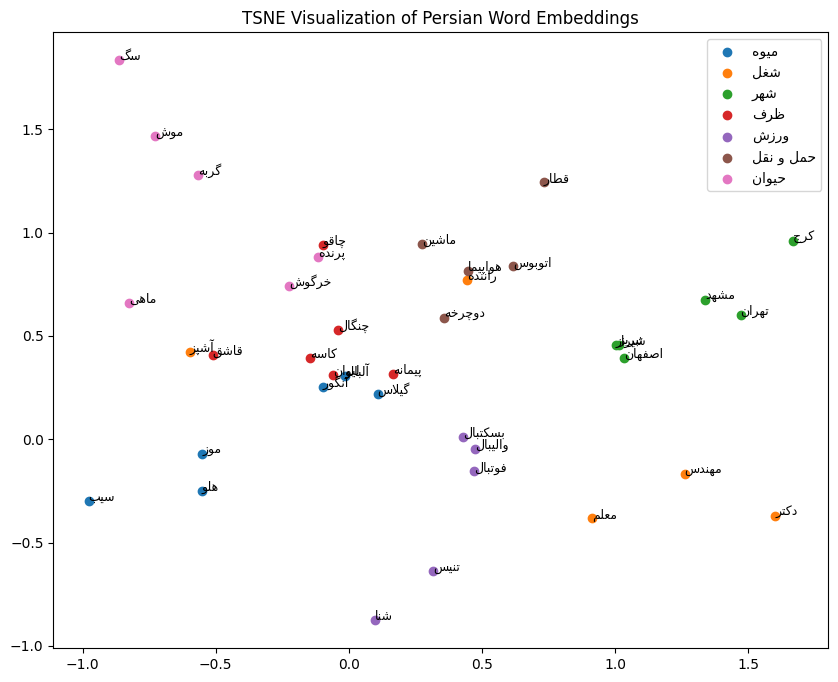

In [4]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display


def fix_persian(text: str) -> str:
    return get_display(arabic_reshaper.reshape(text))


# Categories
categories = {
    "میوه": ["سیب", "موز", "انگور", "هلو", "آلبالو", "گیلاس", "توت فرنگی"],
    "شغل": ["برنامه نویس", "مهندس", "دکتر", "معلم", "راننده", "آشپز"],
    "شهر": ["تهران", "اصفهان", "شیراز", "مشهد", "تبریز", "کرج"],
    "ظرف": ["قاشق", "چنگال", "چاقو", "لیوان", "کاسه", "پیمانه"],
    "ورزش": ["فوتبال", "بسکتبال", "والیبال", "تنیس", "شنا", "دوچرخه سواری"],
    "حمل و نقل": ["ماشین", "اتوبوس", "قطار", "هواپیما", "دوچرخه", "موتور سیکلت"],
    "حیوان": ["گربه", "سگ", "پرنده", "ماهی", "خرگوش", "موش"],
}

words, labels = [], []
for cat, items in categories.items():
    words.extend(items)
    labels.extend([cat] * len(items))


in_vocab_words, in_vocab_labels, embeddings = [], [], []
for word, label in zip(words, labels):
    vec = embbeder(word)
    if vec is not None:
        embeddings.append(vec)
        in_vocab_words.append(word)
        in_vocab_labels.append(label)

embeddings = np.vstack(embeddings)

tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto")
embeddings_2d = tsne.fit_transform(embeddings)


plt.figure(figsize=(10, 8))
for cat in categories:
    idx = [i for i, label in enumerate(in_vocab_labels) if label == cat]
    if not idx:
        continue
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=fix_persian(cat))
    for i in idx:
        plt.text(
            embeddings_2d[i, 0],
            embeddings_2d[i, 1],
            fix_persian(in_vocab_words[i]),
            fontsize=9,
        )

plt.legend()
plt.title("TSNE Visualization of Persian Word Embeddings")
plt.show()

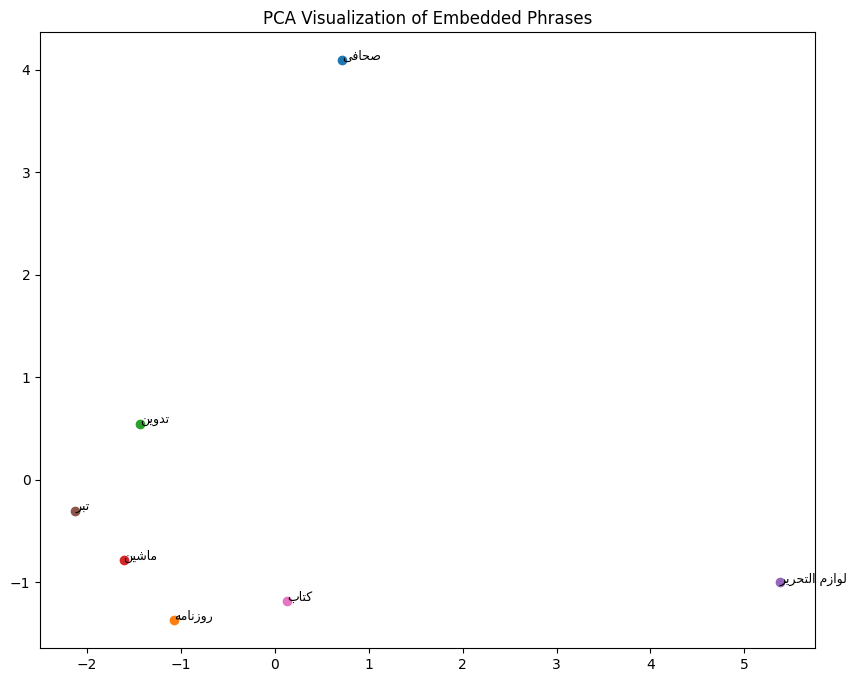

In [5]:
from shekar.embeddings.albert_embedder import AlbertEmbedder
import numpy as np
import matplotlib.pyplot as plt

embedder = AlbertEmbedder()

phrases = [
    "صحافی",
    "روزنامه",
    "تدوین",
    "ماشین",
    "لوازم التحریر",
    "تبر",
    "کتاب",
]

# Embed the phrases
phrase_embeddings = np.vstack([embedder(phrase) for phrase in phrases])

from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=2, random_state=42)
embeddings_2d_phrases = pca.fit_transform(phrase_embeddings)

# Plot
plt.figure(figsize=(10, 8))
for i, phrase in enumerate(phrases):
    plt.scatter(embeddings_2d_phrases[i, 0], embeddings_2d_phrases[i, 1])
    plt.text(
        embeddings_2d_phrases[i, 0],
        embeddings_2d_phrases[i, 1],
        fix_persian(phrase),
        fontsize=9,
    )
plt.title("PCA Visualization of Embedded Phrases")
plt.show()

In [6]:
doc_text = """

 
یک مدت بود که به خواندنِ نوشته‌های آدم‌های هم‌سن‌وسال خودم سرگرم شدم و این کار رو یکی از برنامه‌های همیشگی خودم قرار داده بودم. از چکیده‌ خوانی روزانۀ مقاله‌های فارسی زبان گرفته تا کتاب و رمان و مقاله و جزوه، از نوشته‌های وبلاگ‌ها گرفته تا متن‌های کپشن‌ها و یادداشت‌های پیج‌ها و کانال‌ها.

باتوجه به دانسته‌های خودم وقتی این نوشته‌ها رو تجزیه‌و‌تحلیل می‌کردم گاهی به چیزهای جالب و آموزنده‌ای برخوردمی‌کردم. تازه متوجه می‌شدم دنیای نویسندگی، دنیای واژه‌ها چه دنیای عجیب، مبهم و پررمزورازی است. دنیای بینش و آگاهی، دنیای تشبیه‌ها و استعاره‌ها و دنیای بی‌انتهای جمله‌ها و معناها...

 

انگار نویسنده‌ها، فارغ از خوب‌و‌بد دنیا، زشتی‌ها و زیبایی‌ها و فراز و نشیب‌ها، در دنیایی دیگر؛ دنیایی آزاد و پر از زیبایی زندگی می‌کنند؛ دنیایی که با سلیقۀ خودشان ساخته‌اند و ناگفته‌ها را آنجا گفته‌اند...

 

البته این را بگویم من یازده سال است که می‌نویسم از یادداشت‌های درسی گرفته تا دل‌نوشته‌ از خاطرات تلخ و شیرین گرفته تا یادداشت‌های روزانه؛ ولی تا همین چند وقت پیش یا شاید چند سال پیش، اینقدر نویسندگی و دنیای واژه‌ها برایم حس غریب و آشنا پیدا نکرده بود.
 

"""

doc_embedding = embedder(doc_text)